<a href="https://colab.research.google.com/github/maocak/Arduino-Cesitli-Kodlar/blob/main/python/liner%20regrasyoh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build Linear Regression Model in Python**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, I will be showing you how to build a linear regression model in Python using the scikit-learn package.

Inspired by [scikit-learn's Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

---

## **Load the Diabetes dataset** (via scikit-learn)

### **Import library**

In [12]:
from sklearn import datasets

### **Load dataset**

In [13]:
diabetes = datasets.load_diabetes()

In [14]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### **Description of the Diabetes dataset**

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### **Feature names**

In [15]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### **Create X and Y data matrices**

In [6]:
X = diabetes.data
Y = diabetes.target

In [7]:
X.shape, Y.shape

((442, 10), (442,))

### **Load dataset + Create X and Y data matrices (in 1 step)**

In [8]:
X, Y = datasets.load_diabetes(return_X_y=True)

In [16]:
X.shape, Y.shape

((442, 10), (442,))

## **Load the Boston Housing dataset (via GitHub)**

The Boston Housing dataset was obtained from the mlbench R package, which was loaded using the following commands:

```
library(mlbench)
data(BostonHousing)
```

For your convenience, I have also shared the [Boston Housing dataset](https://github.com/dataprofessor/data/blob/master/BostonHousing.csv) on the Data Professor GitHub package.

### **Import library**

In [ ]:
import pandas as pd

### **Download CSV from GitHub**

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2020-03-30 07:43:30--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2020-03-30 07:43:36--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.03s   

2020-03-30 07:43:37 (1.25 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



### **Read in CSV file**

In [ ]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### **Split dataset to X and Y variables**

In [ ]:
Y = BostonHousing.medv
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [ ]:
X = BostonHousing.drop(['medv'], axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## **Data split**

### **Import library**

In [17]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data dimension**

In [19]:
X_train.shape, Y_train.shape

((353, 10), (353,))

In [20]:
X_test.shape, Y_test.shape

((89, 10), (89,))

## **Linear Regression Model**

### **Import library**

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

#### Defines the regression model

In [23]:
model = linear_model.LinearRegression()

#### Build training model

In [25]:
model.fit(X_train, Y_train)

LinearRegression()

#### Apply trained model to make prediction (on test set)

In [26]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-1.00050462e-01  4.25597647e-02  4.88553708e-02  3.85303261e+00
 -1.71332360e+01  3.91262456e+00  5.06045646e-04 -1.30894438e+00
  2.78526738e-01 -1.06247981e-02 -9.55659863e-01  9.59720319e-03
 -5.09207833e-01]
Intercept: 33.890629034122
Mean squared error (MSE): 26.54
Coefficient of determination (R^2): 0.71


In [27]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [30]:
r2_score(Y_test, Y_pred)

0.4535982481704268

In [31]:
r2_score(Y_test, Y_pred).dtype

AttributeError: 'float' object has no attribute 'dtype'

We will be using the modulo operator to format the numbers by rounding it off.

In [32]:
'%f' % 0.523810833536016

'0.523811'

We will now round it off to 3 digits

In [33]:
'%.3f' % 0.523810833536016

'0.524'

We will now round it off to 2 digits

In [34]:
'%.2f' % 0.523810833536016

'0.52'

## **Scatter plots**

### **Import library**

In [36]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [37]:
Y_test

array([200., 102., 257., 200., 259., 170., 200.,  83., 262., 242., 115.,
       303.,  69., 220., 279., 225., 220., 102., 150.,  97., 148., 181.,
       215.,  43., 150., 100.,  75., 103.,  74., 143., 281., 109., 135.,
       107.,  90., 296., 178.,  90.,  57.,  84.,  64., 281.,  77., 144.,
        55., 124.,  50., 259., 245., 230.,  85., 142., 242., 162.,  65.,
        99., 104.,  53., 174., 128.,  85.,  90., 152., 258.,  91., 161.,
        77., 126.,  91., 171., 245., 172., 185., 173.,  52., 129., 184.,
       147., 143., 265., 310., 185., 131., 138., 101., 292.,  53., 206.,
       122.])

In [38]:
import numpy as np
np.array(Y_test)

array([200., 102., 257., 200., 259., 170., 200.,  83., 262., 242., 115.,
       303.,  69., 220., 279., 225., 220., 102., 150.,  97., 148., 181.,
       215.,  43., 150., 100.,  75., 103.,  74., 143., 281., 109., 135.,
       107.,  90., 296., 178.,  90.,  57.,  84.,  64., 281.,  77., 144.,
        55., 124.,  50., 259., 245., 230.,  85., 142., 242., 162.,  65.,
        99., 104.,  53., 174., 128.,  85.,  90., 152., 258.,  91., 161.,
        77., 126.,  91., 171., 245., 172., 185., 173.,  52., 129., 184.,
       147., 143., 265., 310., 185., 131., 138., 101., 292.,  53., 206.,
       122.])

In [39]:
Y_pred

array([114.19864531, 113.71761282, 192.71813002, 146.91407698,
       243.83227937, 132.59124484,  76.40225717,  64.96728996,
       179.9493194 , 281.96361913,  89.23248241, 262.30298687,
        98.69273286, 215.25420691, 222.73478336, 227.73547781,
       198.75907752, 102.15170836, 124.30138179, 124.40142284,
       129.63770399, 176.94793083, 247.86865042,  59.42555429,
       206.83643085, 155.85924586,  64.46838759, 143.68670465,
        86.58652877,  60.7774818 , 286.30716908, 160.71486446,
       127.18622395, 181.33361672, 105.73024019, 220.93417507,
       118.72395934,  47.02684413,  50.43623345, 124.68862793,
       110.38882671, 254.00697639,  54.7260217 , 163.54310707,
       155.00184485, 175.71940365, 139.57080288, 227.49426552,
       251.38779408, 289.26019862, 181.88692843, 105.71750028,
       172.19606779, 124.96420469,  51.46038399,  52.04149348,
       105.1798486 , 122.99424477, 178.97251988, 236.13141841,
        52.71995406, 139.25548079, 108.22217704, 241.82

#### Making the scatter plot

<Axes: xlabel='Actual', ylabel='Predicted'>

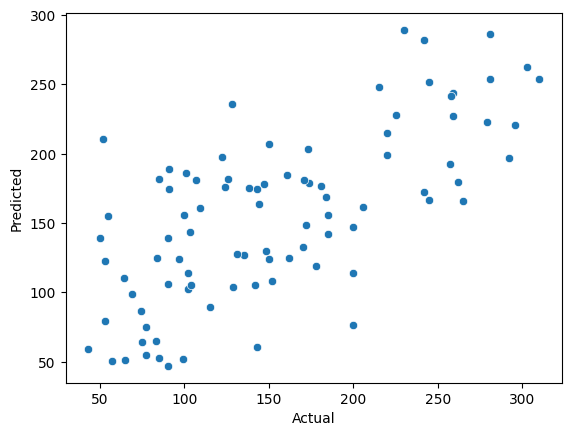

In [43]:
import seaborn as sns
import pandas as pd
# Create a DataFrame with 'Actual' and 'Predicted' columns
data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

# Now use the 'x' and 'y' arguments to specify columns
sns.scatterplot(x='Actual', y='Predicted', data=data)

<Axes: xlabel='Actual', ylabel='Predicted'>

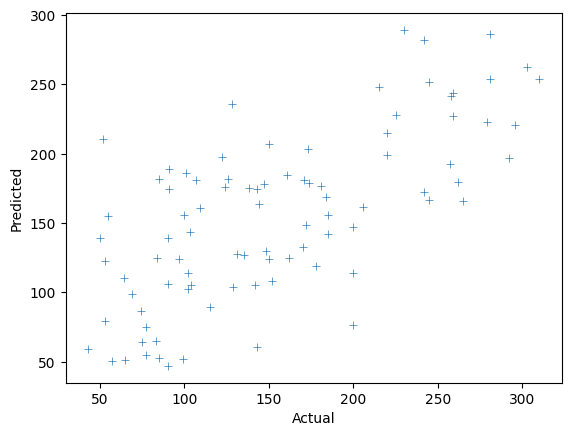

In [45]:
import seaborn as sns
import pandas as pd

# Create a DataFrame with 'Actual' and 'Predicted' columns
data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

# Use the 'x' and 'y' arguments to specify columns within the DataFrame
sns.scatterplot(x='Actual', y='Predicted', data=data, marker="+")

<Axes: xlabel='Actual', ylabel='Predicted'>

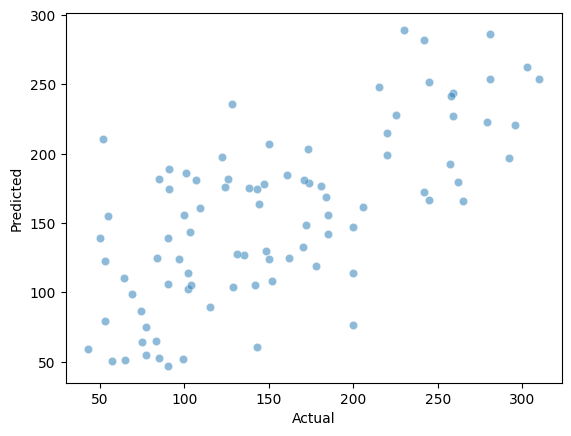

In [49]:
import seaborn as sns
import pandas as pd

# Create a DataFrame with 'Actual' and 'Predicted' columns
data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

# Use the 'x' and 'y' arguments to specify columns within the DataFrame
sns.scatterplot(x='Actual', y='Predicted', data=data, alpha=0.5)  # Pass alpha as a keyword argument